In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [90]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('TSLA', 'yahoo', start, end)
df.head()

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222

In [91]:
df.tail()

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2019-12-24  85.094002  82.538002  83.671997  85.050003  40273500  85.050003
2019-12-26  86.695999  85.269997  85.582001  86.188004  53169500  86.188004
2019-12-27  87.061996  85.222000  87.000000  86.075996  49728500  86.075996
2019-12-30  85.800003  81.851997  85.758003  82.940002  62932000  82.940002
2019-12-31  84.258003  80.416000  81.000000  83.666000  51428500  83.666000

In [92]:
df = df.reset_index()
df.head()

Date   High    Low   Open  Close    Volume  Adj Close
0 2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
1 2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2 2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
3 2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
4 2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222

In [93]:
df = df.drop(['Date', 'Adj Close'],axis =1)
df.head()

High    Low   Open  Close    Volume
0  5.000  3.508  3.800  4.778  93831500
1  6.084  4.660  5.158  4.766  85935500
2  5.184  4.054  5.000  4.392  41094000
3  4.620  3.742  4.600  3.840  25699000
4  4.000  3.166  4.000  3.222  34334500

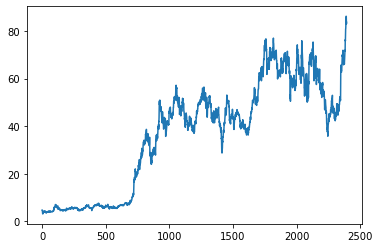

In [94]:
plt.plot(df.Close)

In [95]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    56.71740
2390    57.12264
2391    57.52190
2392    57.88446
2393    58.24452
Name: Close, Length: 2394, dtype: float64

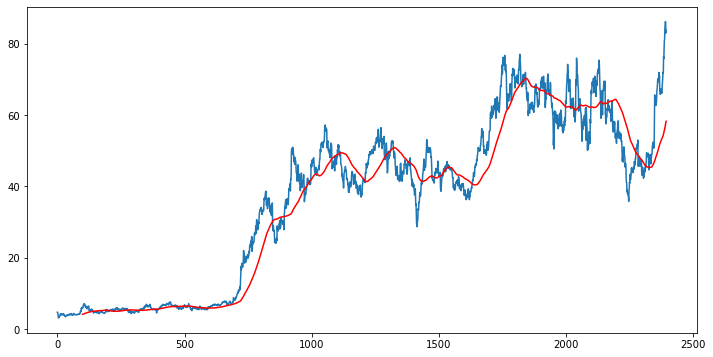

In [96]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [97]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2389    52.43210
2390    52.57408
2391    52.71450
2392    52.85377
2393    53.00261
Name: Close, Length: 2394, dtype: float64

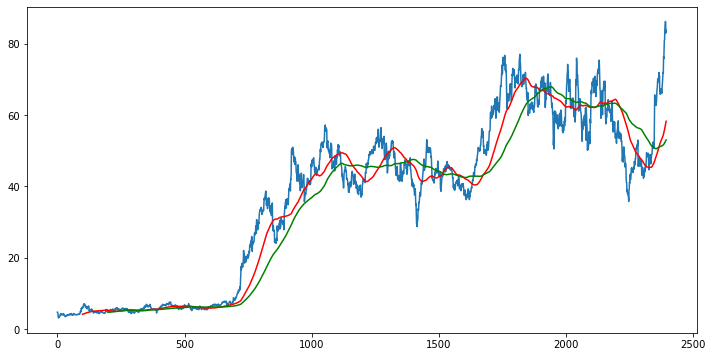

In [98]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [99]:
df.shape

(2394, 5)

In [100]:
#splitting Data into traning and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [101]:
data_training.head()

Close
0  4.778
1  4.766
2  4.392
3  3.840
4  3.222

In [102]:
data_testing.head()

Close
1675  51.198002
1676  51.400002
1677  49.245998
1678  49.998001
1679  50.004002

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [104]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971432],
       [0.02279456],
       ...,
       [0.94889726],
       [0.96799142],
       [0.9536338 ]])

In [105]:
data_training_array.shape

(1675, 1)

In [106]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train =np.array(x_train),np.array(y_train)

In [107]:
x_train.shape

(1575, 100, 1)

In [108]:
# ML Model

In [109]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [110]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [112]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 9s 187ms/step - loss: 0.0713
Epoch 2/50
50/50 [==============================] - 11s 225ms/step - loss: 0.0141
Epoch 3/50
50/50 [==============================] - 13s 254ms/step - loss: 0.0117
Epoch 4/50
50/50 [==============================] - 13s 258ms/step - loss: 0.0106
Epoch 5/50
50/50 [==============================] - 13s 257ms/step - loss: 0.0102
Epoch 6/50
50/50 [==============================] - 13s 264ms/step - loss: 0.0093
Epoch 7/50
50/50 [==============================] - 13s 268ms/step - loss: 0.0089
Epoch 8/50
50/50 [==============================] - 13s 268ms/step - loss: 0.0085
Epoch 9/50
50/50 [==============================] - 13s 266ms/step - loss: 0.0091
Epoch 10/50
50/50 [==============================] - 14s 271ms/step - loss: 0.0083
Epoch 11/50
50/50 [==============================] - 13s 255ms/step - loss: 0.0082
Epoch 12/50
50/50 [==============================] - 13s 266ms/step - loss: 0.0077
Epoch 13/50
50

In [70]:
model.save('keras_model.h5')

In [71]:
data_testing.head()

Close
1675  51.198002
1676  51.400002
1677  49.245998
1678  49.998001
1679  50.004002

In [72]:
data_training.tail(100)

Close
1575  40.139999
1576  40.806000
1577  42.740002
1578  42.282001
1579  41.692001
...         ...
1670  55.952000
1671  53.790001
1672  54.445999
1673  55.478001
1674  54.702000

[100 rows x 1 columns]

In [78]:
past_100_days = data_training.tail(100)

In [79]:
final_df = past_100_days.append(data_testing, ignore_index = True)

IndexError: list index out of range

In [42]:
final_df.head()

Close
0  40.139999
1  40.806000
2  42.740002
3  42.282001
4  41.692001

In [80]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.08624043],
       [0.0994563 ],
       [0.13783391],
       [0.12874553],
       [0.11703778],
       [0.08743108],
       [0.07000833],
       [0.0872326 ],
       [0.08385922],
       [0.08945507],
       [0.08441484],
       [0.06961144],
       [0.05949123],
       [0.07989047],
       [0.09759103],
       [0.07989047],
       [0.08381955],
       [0.09441598],
       [0.09274912],
       [0.09235232],
       [0.09937689],
       [0.08334326],
       [0.07445335],
       [0.04691039],
       [0.035917  ],
       [0.03353578],
       [0.04599755],
       [0.05651465],
       [0.06338056],
       [0.04401322],
       [0.02532049],
       [0.03806014],
       [0.00984248],
       [0.01904994],
       [0.01968489],
       [0.03845695],
       [0.02401085],
       [0.02202644],
       [0.04841851],
       [0.05623684],
       [0.07016714],
       [0.06806366],
       [0.04206855],
       [0.04139386],
       [0.01154901],
       [0.00992182],
       [0.03107516],
       [0.027

In [81]:
input_data.shape

(819, 1)

In [82]:
x_test=[]
y_test=[]

for i in range(input_data.shape[0]):
        x_test.append(input_data[i-100: i])
        y_test.append(input_data[i,0])

In [83]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(819,)
(819,)


In [88]:
#making prediction

y_predicted = model.predict(x_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [86]:
y_predicted.shape

NameError: name 'y_predicted' is not defined

In [113]:
Scaler.scale_

NameError: name 'Scaler' is not defined

In [114]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

NameError: name 'y_predicted' is not defined

NameError: name 'y_predicted' is not defined

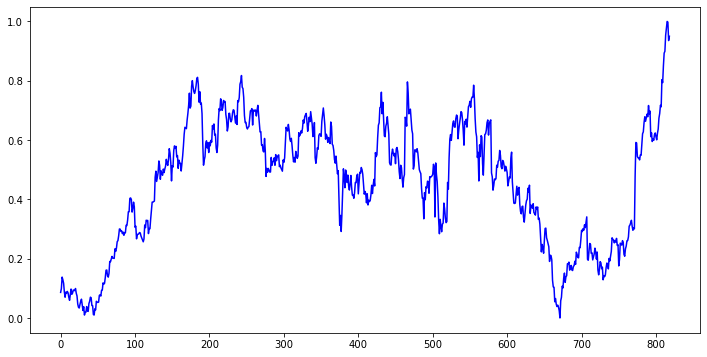

In [115]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
pt.show()


NameError: name 'y_predicted' is not defined

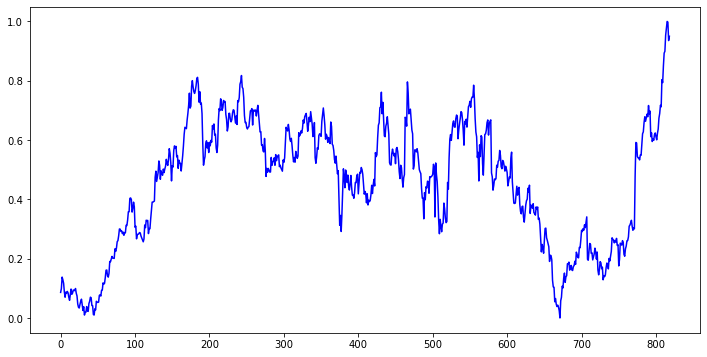

In [116]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()